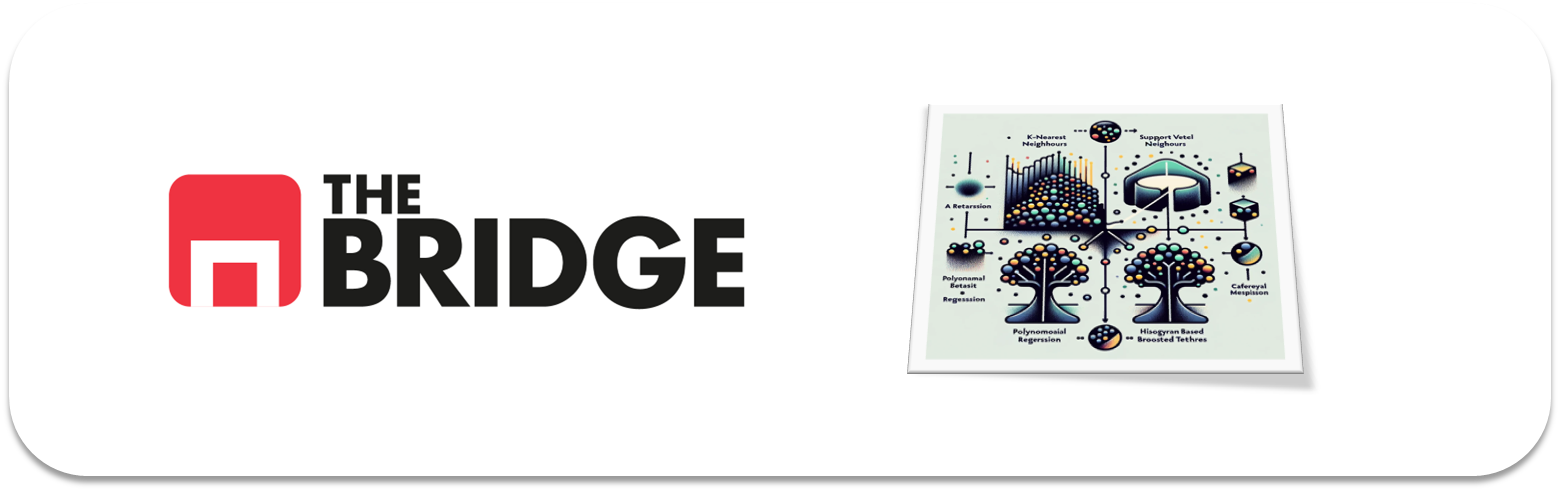

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, make_scorer, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score






### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [3]:
df = pd.read_csv("./data/wines_dataset.csv",sep = "|")
df
target = "quality"
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [5]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

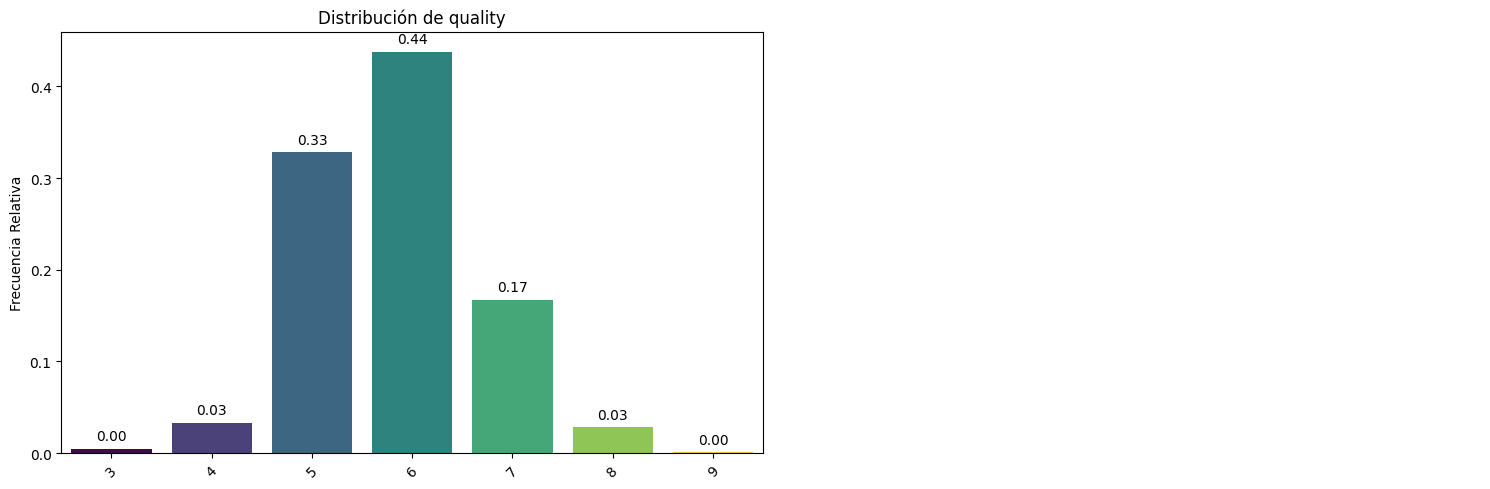

In [6]:
bt.pinta_distribucion_categoricas(train_set, [target], mostrar_valores= True, relativa= True)

In [7]:
features_num = train_set.columns.to_list()
features_num.remove(target) # Aunque luego lo iré añadiendo para ir comparando con el target
print(len(features_num))

12


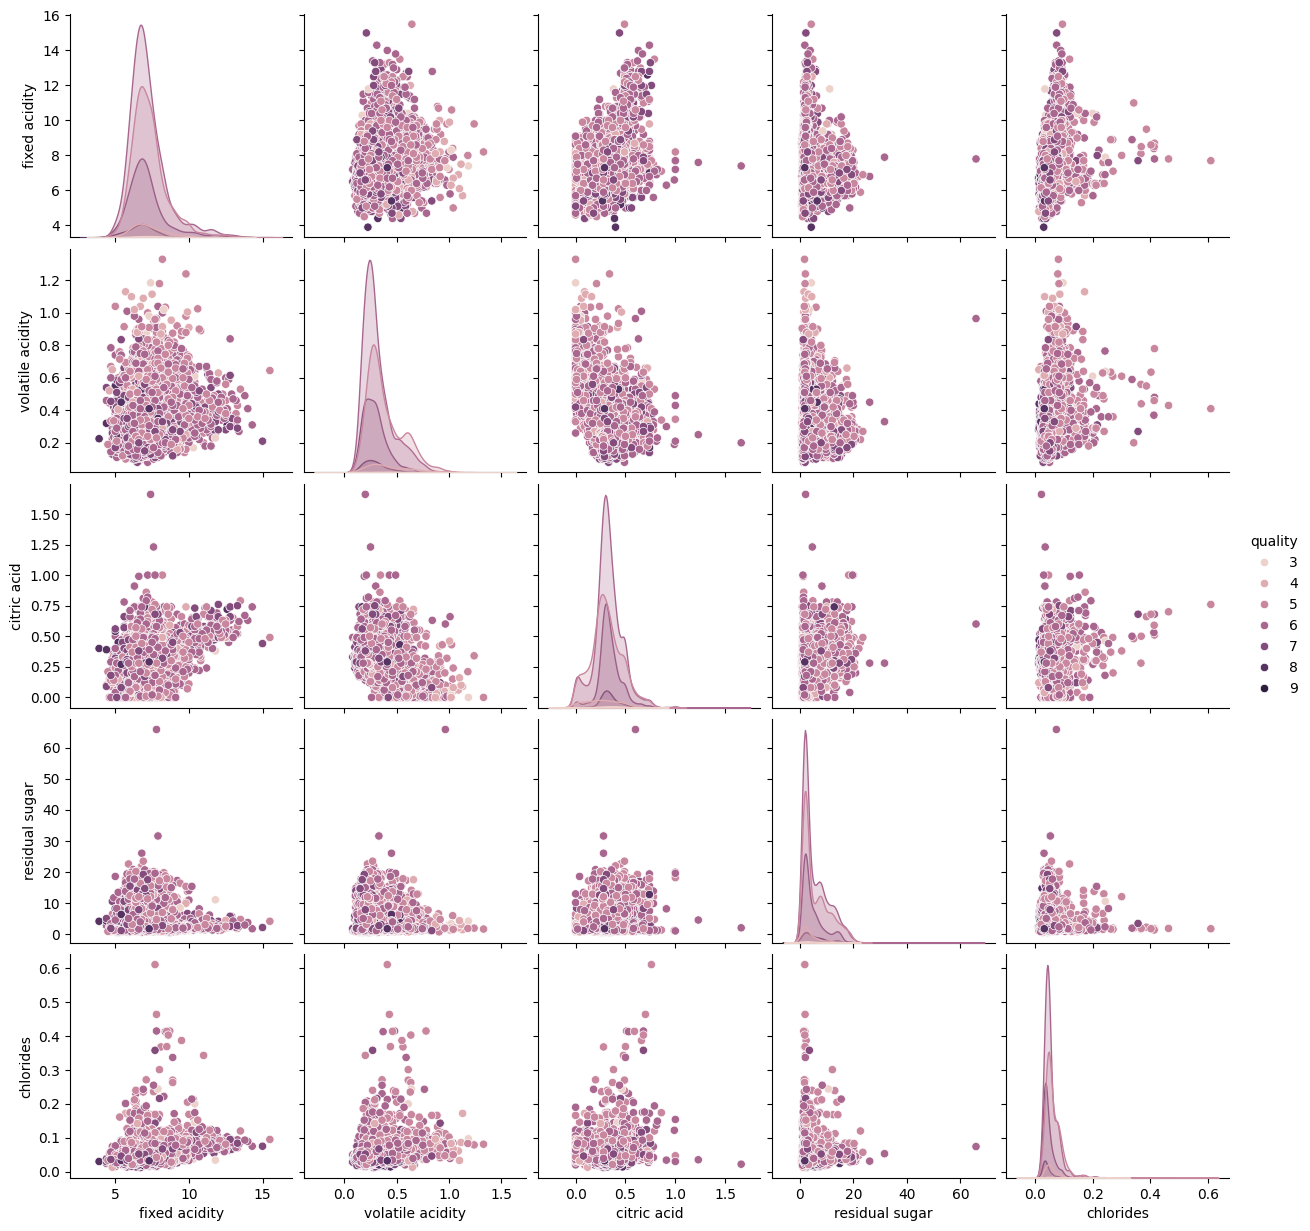

In [8]:
sns.pairplot(train_set[features_num[0:5] + [target]], hue = target)

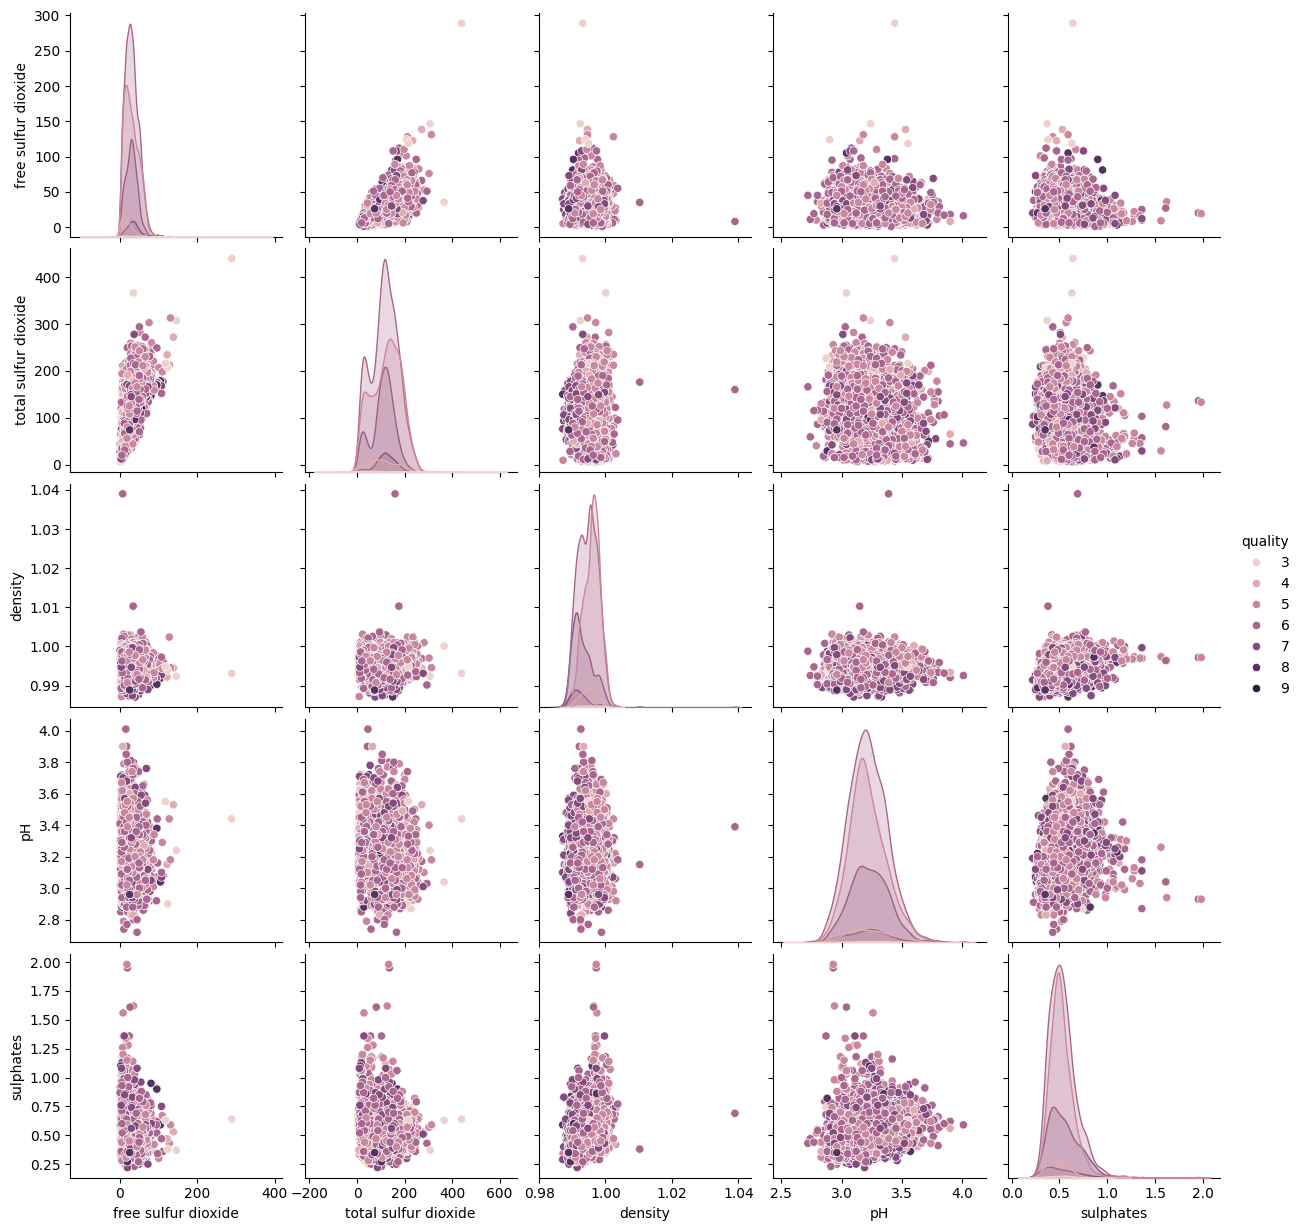

In [9]:
sns.pairplot(train_set[features_num[5:10] + [target]], hue = target)

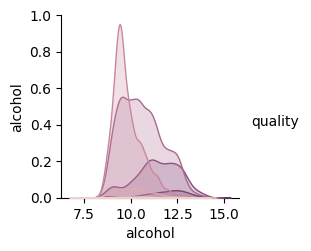

In [10]:
sns.pairplot(train_set[features_num[10:12] + [target]], hue = target)

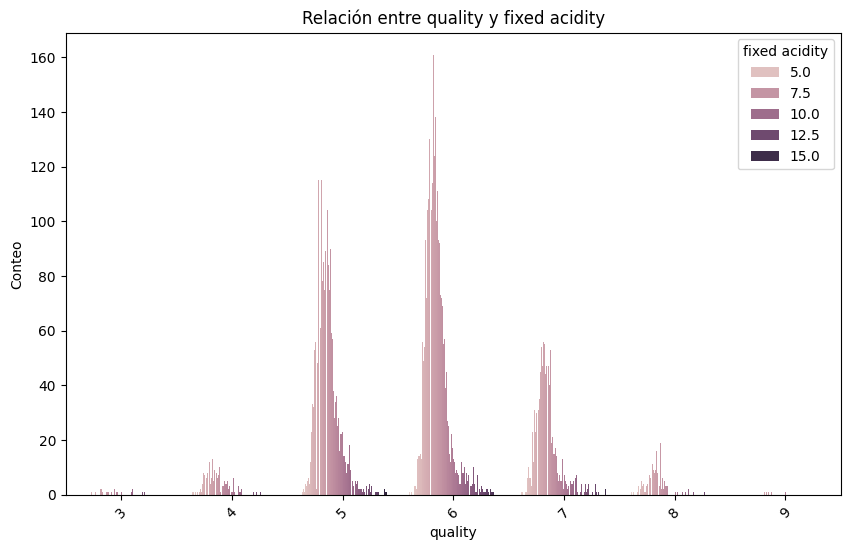

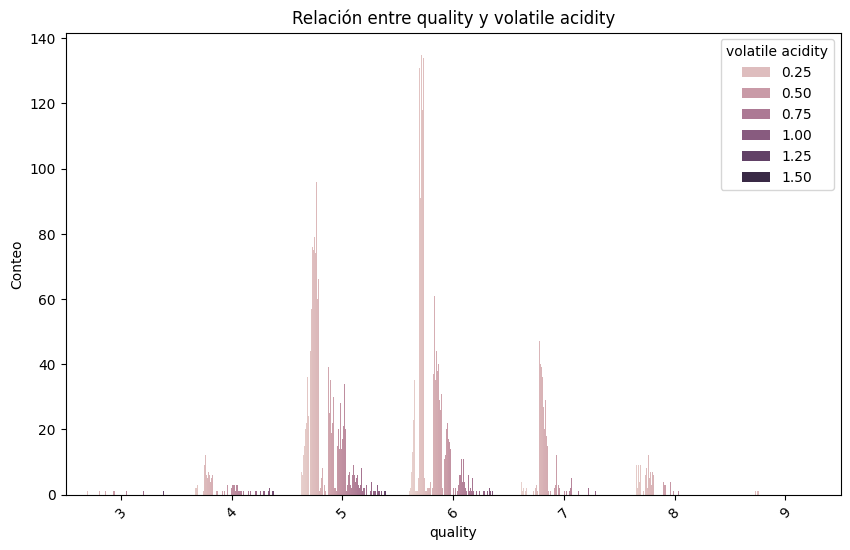

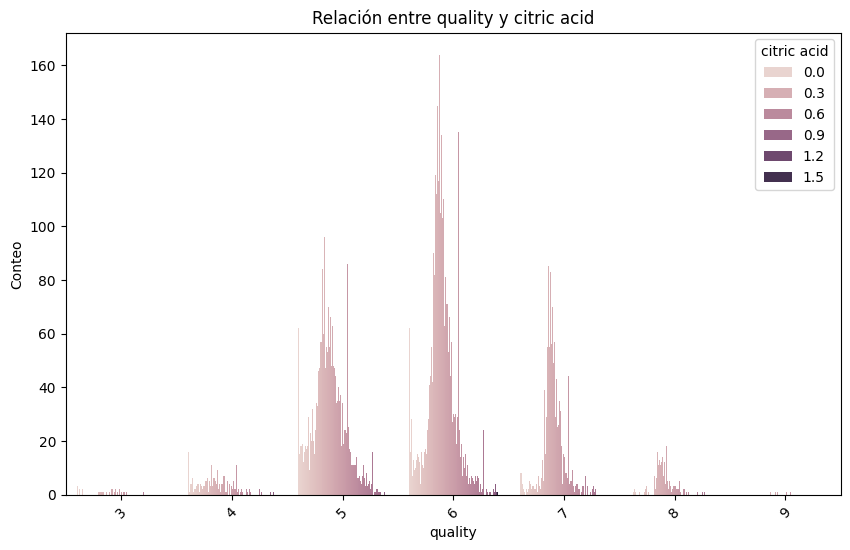

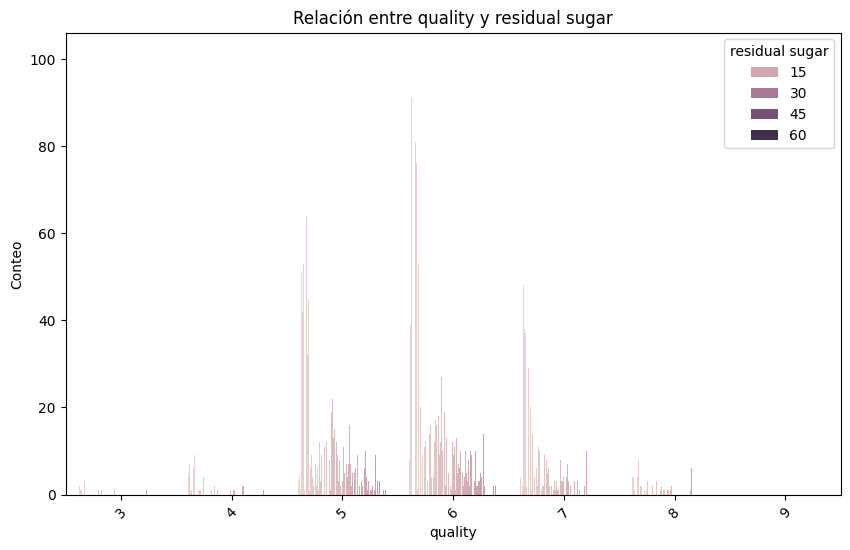

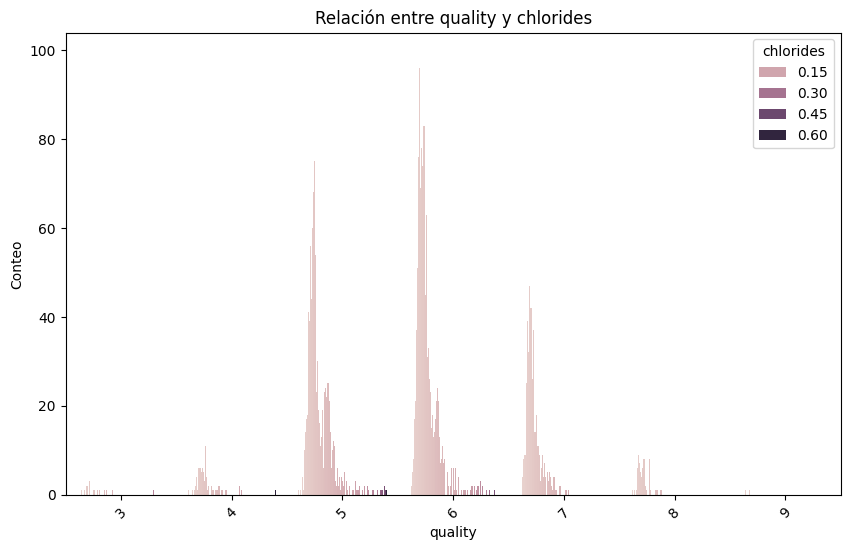

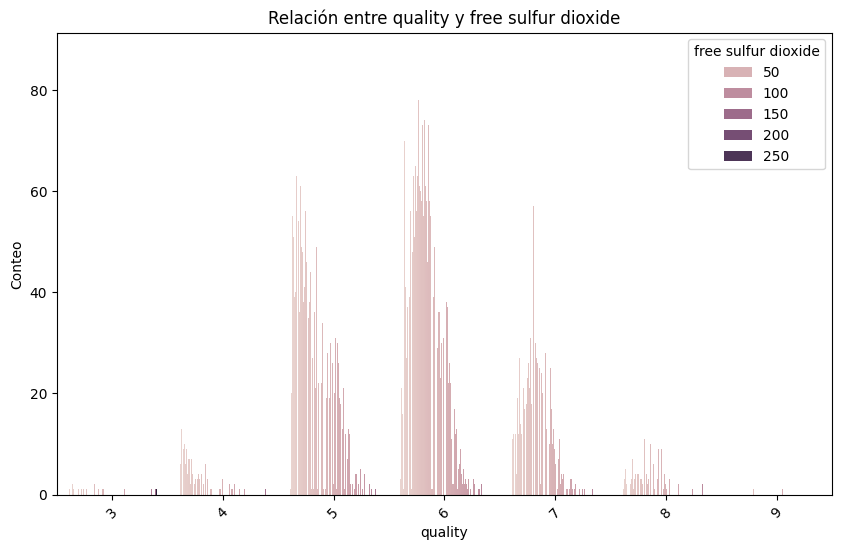

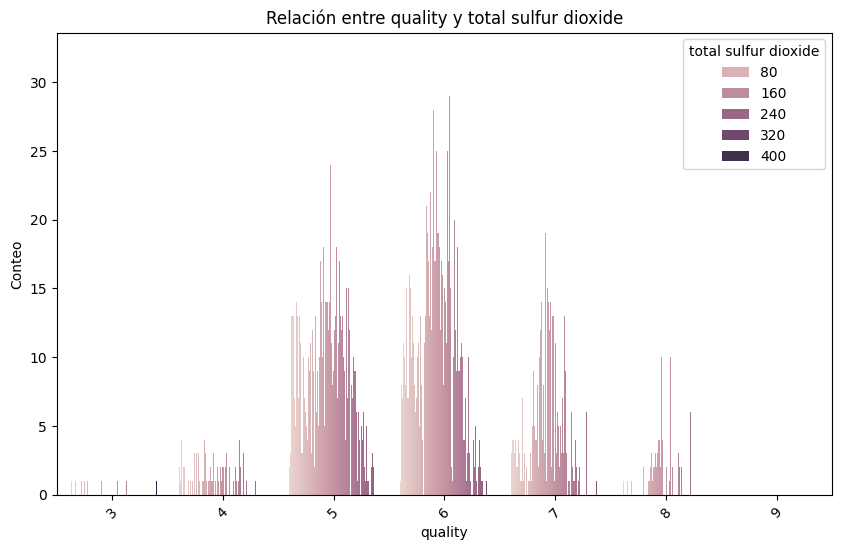

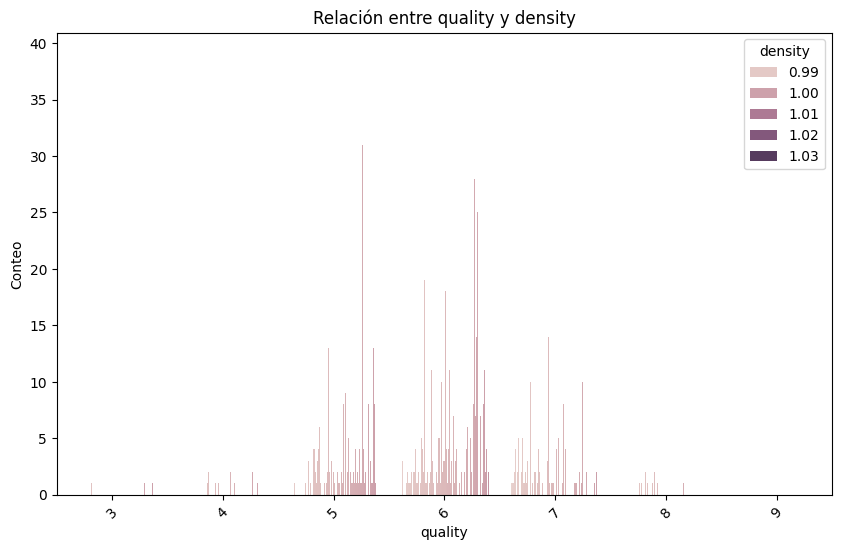

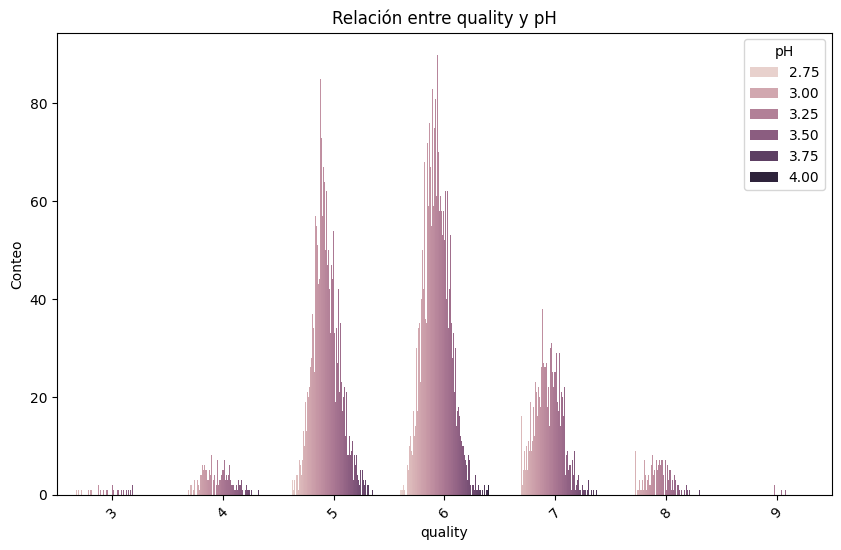

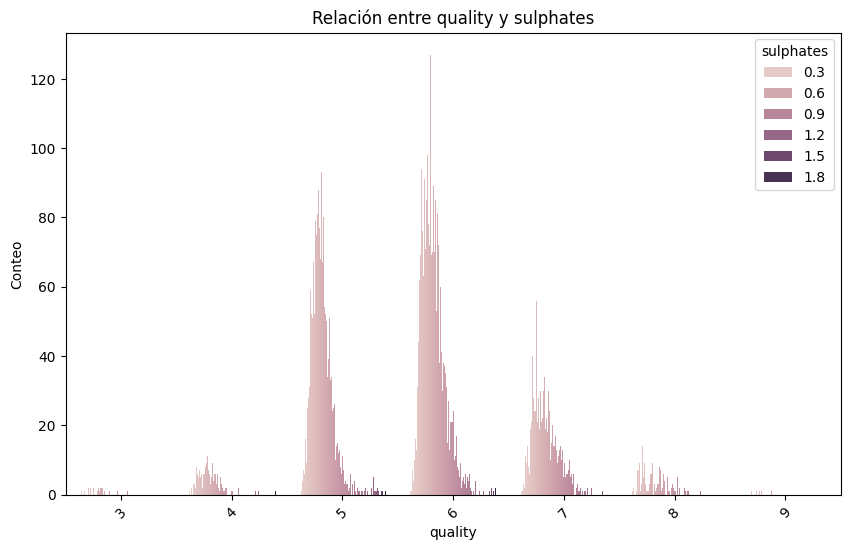

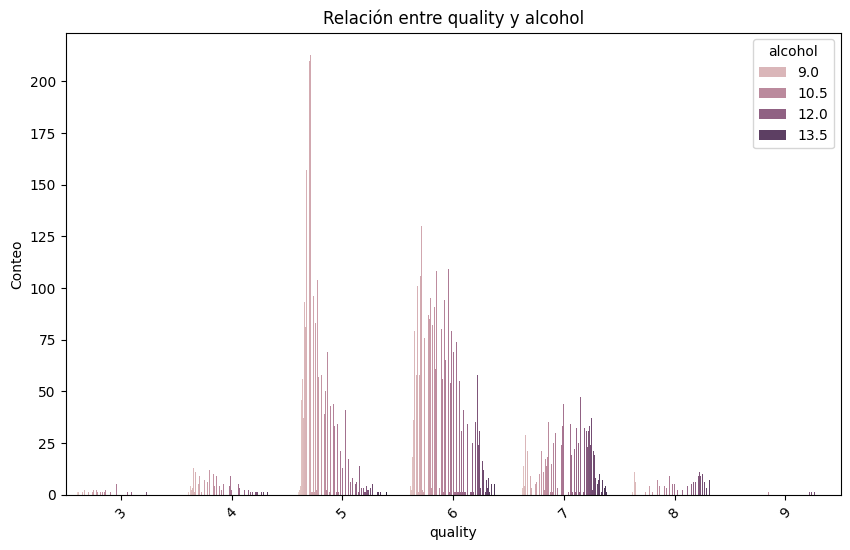

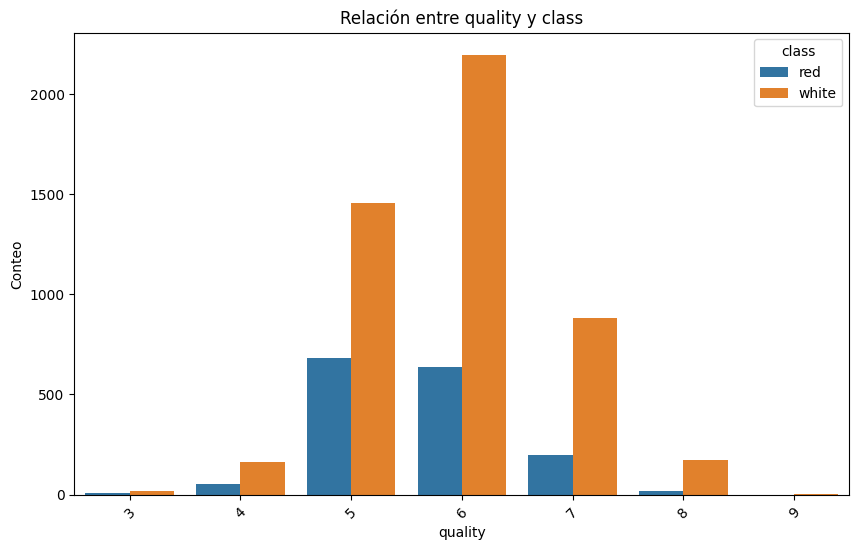

In [11]:
for col in features_num:

    bt.plot_categorical_relationship_fin(df, target, col,   relative_freq=False, show_values=False, size_group = 10)

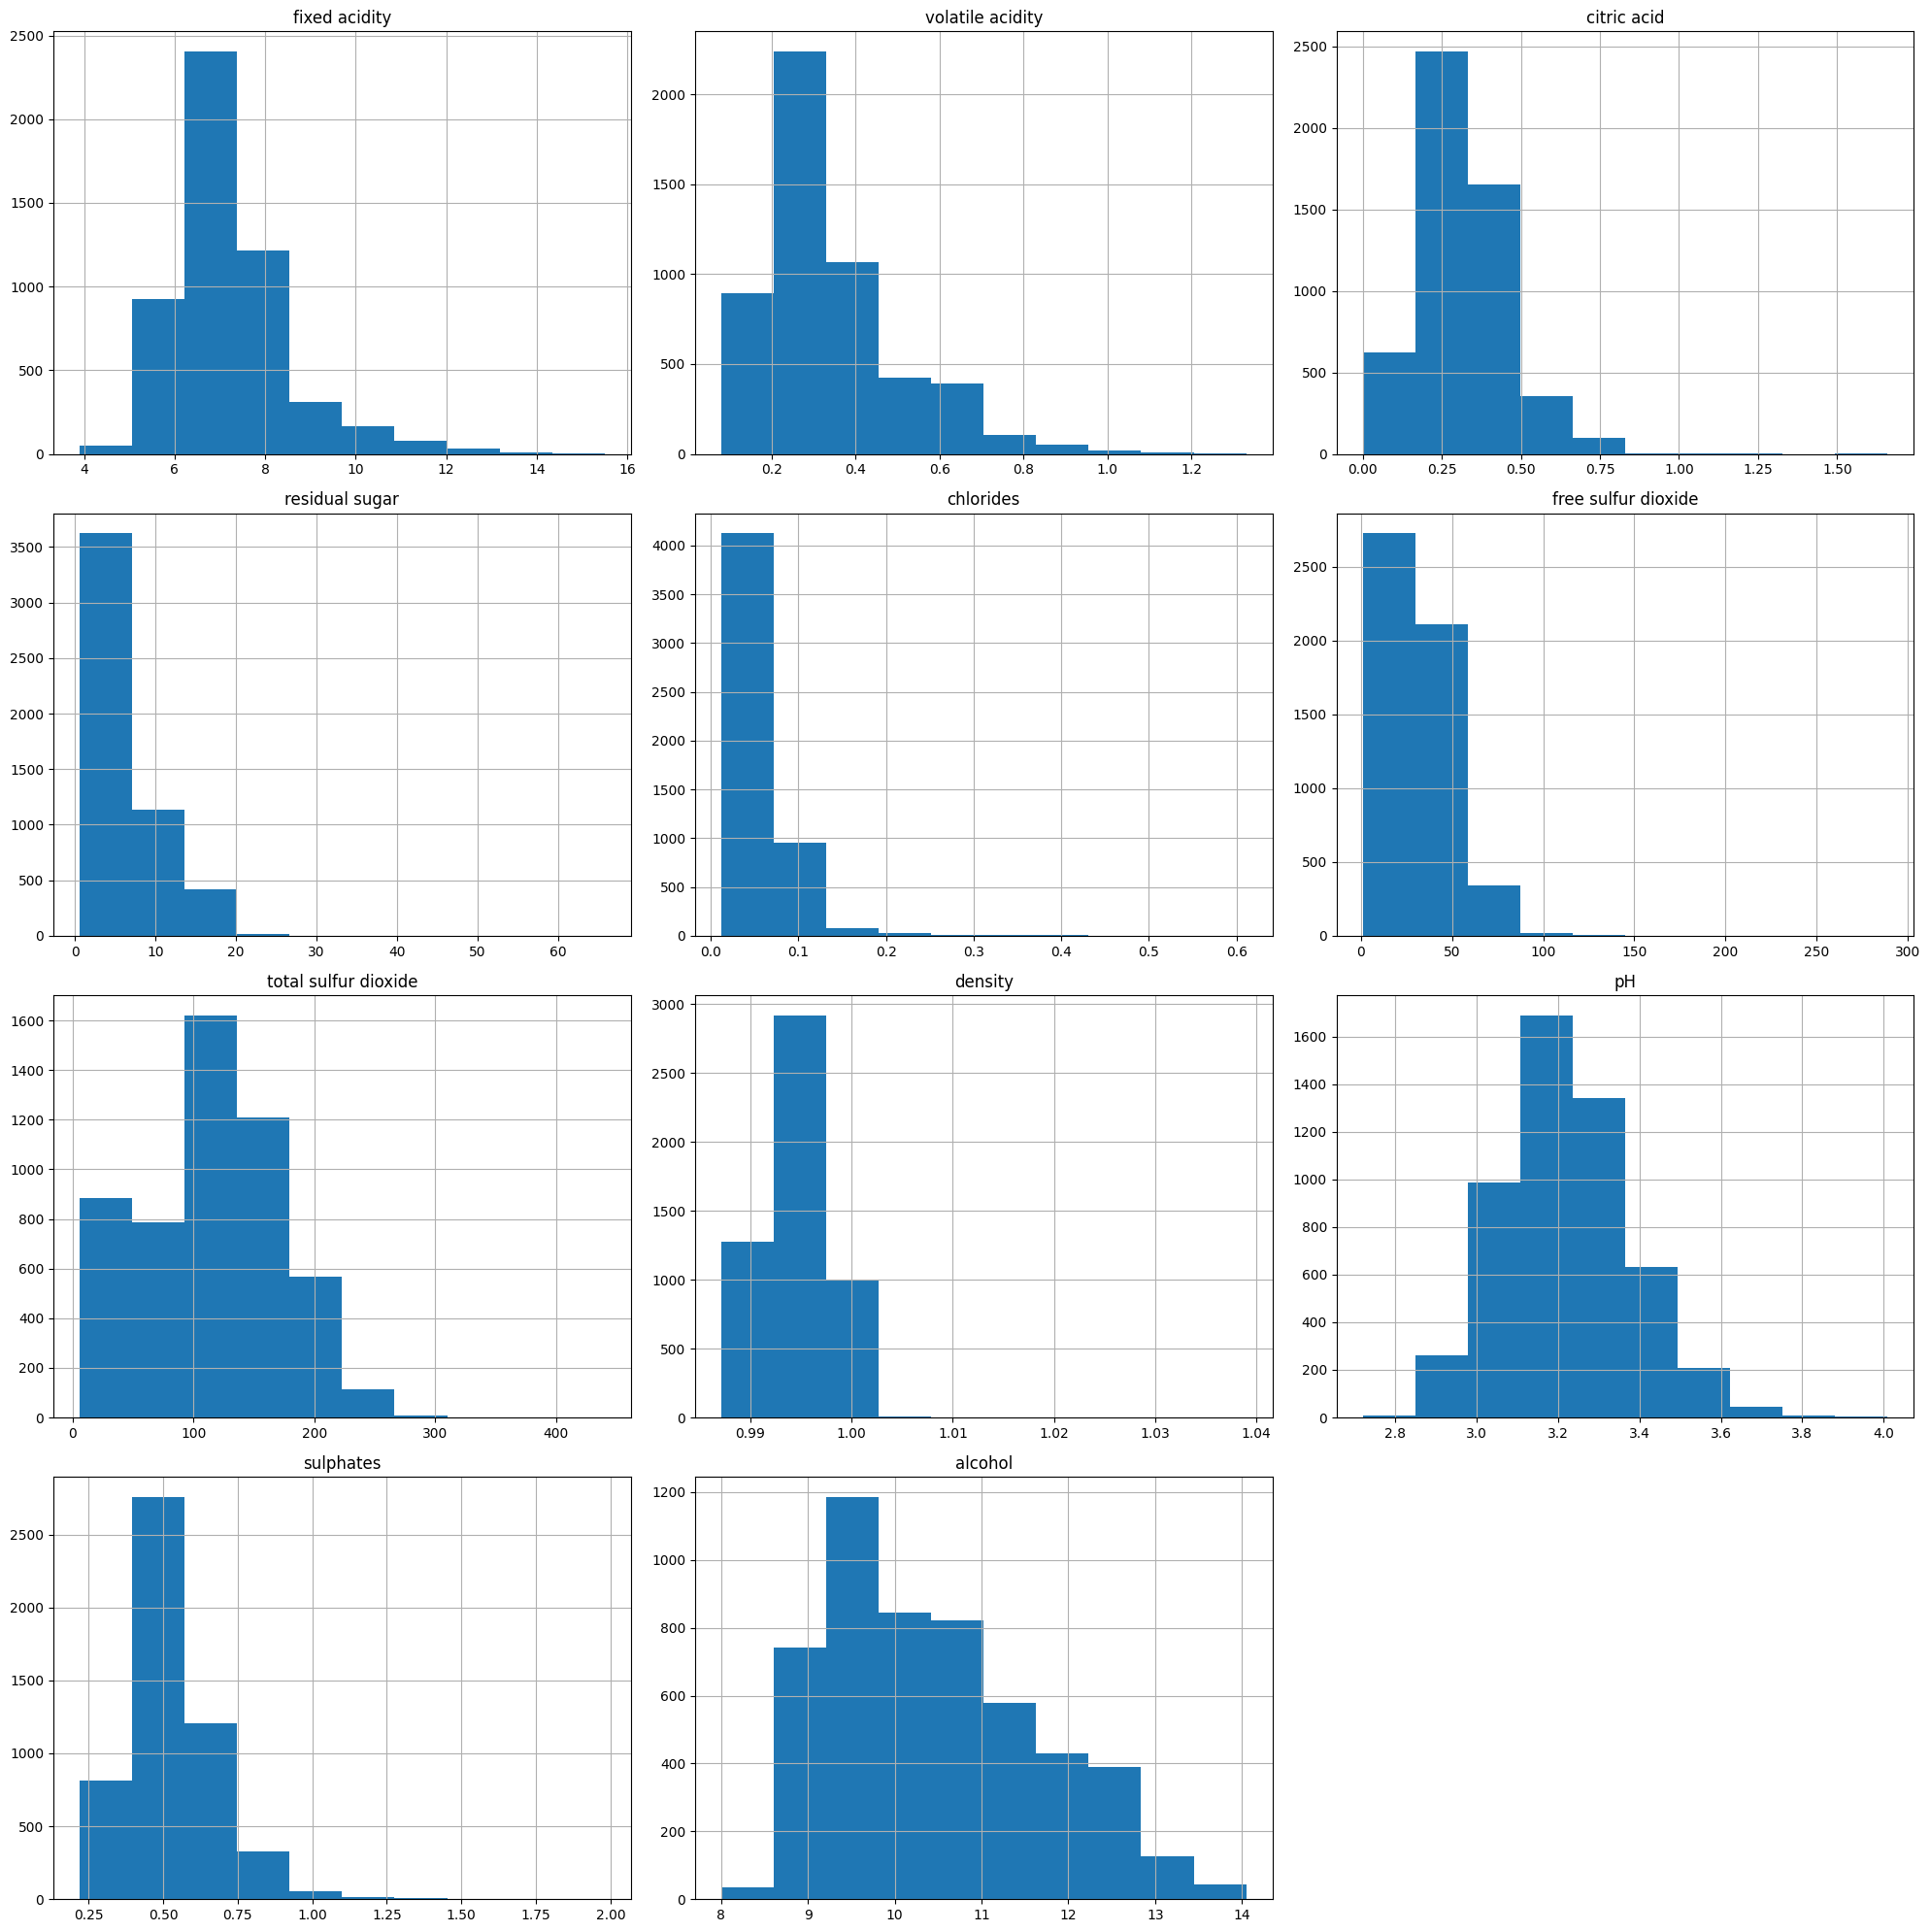

In [12]:
train_set[features_num].hist(figsize = (20,20))
plt.tight_layout()

In [13]:
train_set["class"].replace({"red": 0, "white": 1}, inplace=True)
test_set["class"].replace({"red": 0, "white": 1}, inplace=True)



In [14]:
features_to_transform = ["density", "residual sugar","chlorides", "free sulfur dioxide"]


In [15]:
X_train = train_set.drop("quality", axis = 1)
X_test = test_set.drop("quality", axis = 1)
y_train = train_set["quality"]
y_test = test_set["quality"]


In [16]:
lr_clf = LogisticRegression(max_iter = 1000)
rf_clf = RandomForestClassifier(max_depth= 6, random_state= 42)
lgb_clf = LGBMClassifier(max_depth= 6, random_sate = 42, verbose = -100)
#xgb_clf = XGBClassifier(max_depth = 6, random_state = 42)

modelos = {
    "Regresion Logistica": lr_clf,
    "Random Forest": rf_clf,
   "LGBMClassifier": lgb_clf,
    
}

In [17]:
lr_clf.fit(X_train,y_train)

c:\Users\aferreiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [18]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [19]:
lgb_clf.fit(X_train,y_train)

LGBMClassifier(max_depth=6, random_sate=42, verbose=-100)

In [20]:
y_pred_lr = lr_clf.predict(X_train)
y_pred_rf = rf_clf.predict(X_train)
y_pred_lgb = lgb_clf.predict(X_train)



In [21]:
print("Regresion Logistica", accuracy_score(y_train, y_pred_lr))
print("Random Forest", accuracy_score(y_train, y_pred_rf))
print("LGBMClassifier", accuracy_score(y_train, y_pred_lgb))

Regresion Logistica 0.5385799499711372
Random Forest 0.6145853376948239
LGBMClassifier 0.9020588801231479


Report para Regresion Logistica:
              precision    recall  f1-score   support

           3       1.00      0.04      0.08        24
           4       0.00      0.00      0.00       173
           5       0.60      0.59      0.60      1706
           6       0.51      0.74      0.61      2274
           7       0.46      0.13      0.20       869
           8       0.00      0.00      0.00       146
           9       0.00      0.00      0.00         5

    accuracy                           0.54      5197
   macro avg       0.37      0.21      0.21      5197
weighted avg       0.50      0.54      0.49      5197

Matriz de Confusión:


c:\Users\aferreiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aferreiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aferreiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

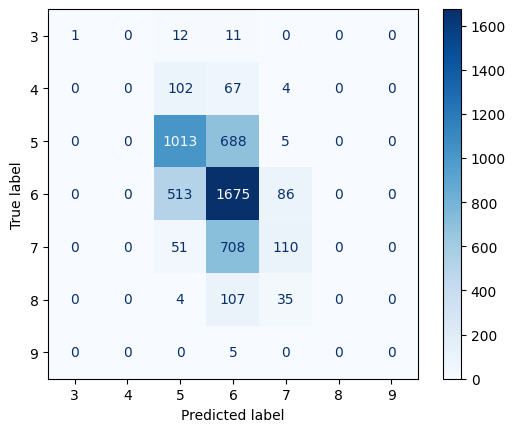

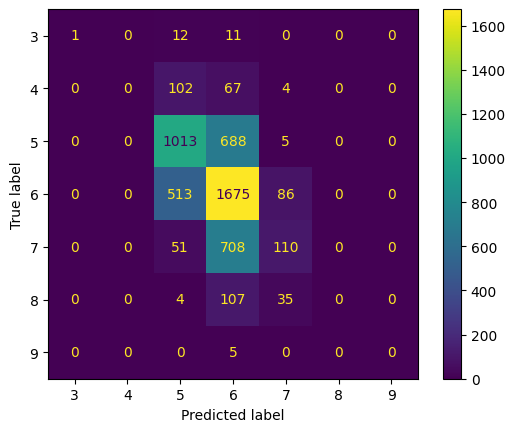




Report para Random Forest:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        24
           4       1.00      0.01      0.02       173
           5       0.67      0.67      0.67      1706
           6       0.57      0.79      0.66      2274
           7       0.75      0.29      0.42       869
           8       1.00      0.01      0.03       146
           9       0.00      0.00      0.00         5

    accuracy                           0.61      5197
   macro avg       0.57      0.25      0.26      5197
weighted avg       0.66      0.61      0.58      5197

Matriz de Confusión:


c:\Users\aferreiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aferreiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aferreiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

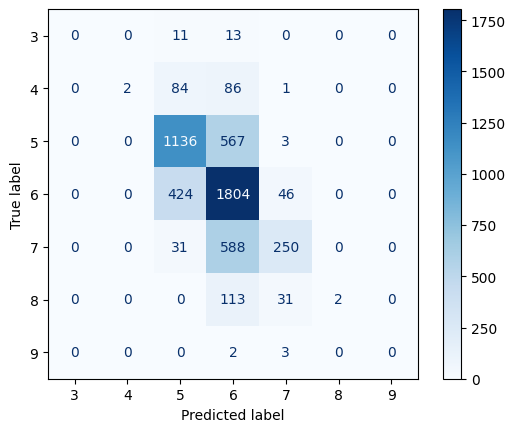

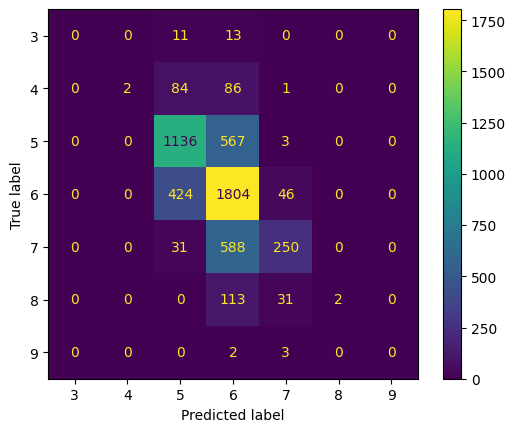




Report para LGBMClassifier:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        24
           4       1.00      0.97      0.98       173
           5       0.90      0.89      0.90      1706
           6       0.87      0.92      0.90      2274
           7       0.95      0.85      0.90       869
           8       1.00      0.97      0.99       146
           9       1.00      1.00      1.00         5

    accuracy                           0.90      5197
   macro avg       0.96      0.94      0.95      5197
weighted avg       0.90      0.90      0.90      5197

Matriz de Confusión:


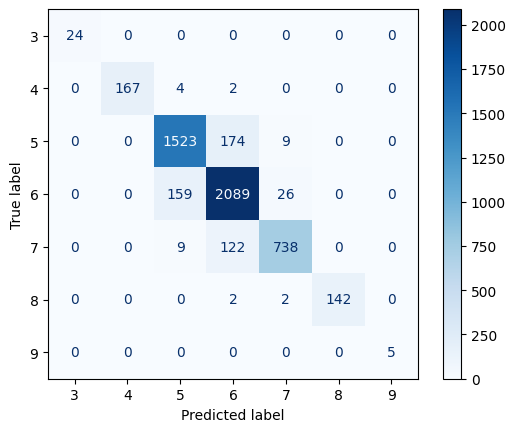

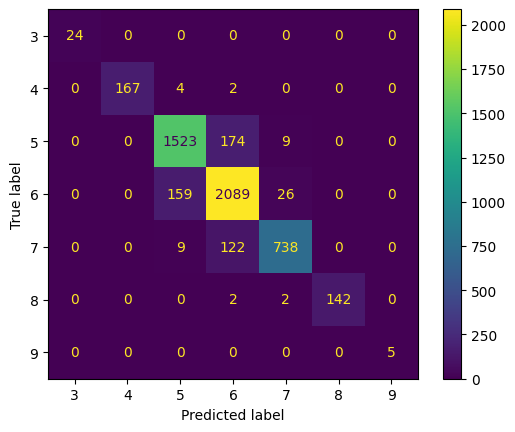

In [22]:

for nombre, modelo in zip(["Regresion Logistica", "Random Forest", "LGBMClassifier"], [lr_clf, rf_clf, lgb_clf]):
    print(f"Report para {nombre}:")
    print(classification_report(y_train, modelo.predict(X_train)))
    print("Matriz de Confusión:")
    ConfusionMatrixDisplay.from_estimator(modelo, X_train, y_train, cmap="Blues").plot()
    plt.show()
    print("\n\n")

In [23]:
y_pred_lr = lr_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_lgb = lgb_clf.predict(X_test)

In [24]:
print("Regresion Logistica", accuracy_score(y_test, y_pred_lr))
print("Random Forest", accuracy_score(y_test, y_pred_rf))
print("LGBMClassifier", accuracy_score(y_test, y_pred_lgb))

Regresion Logistica 0.5230769230769231
Random Forest 0.5746153846153846
LGBMClassifier 0.6515384615384615


Report para Regresion Logistica:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.58      0.56      0.57       432
           6       0.50      0.74      0.60       562
           7       0.40      0.10      0.17       210
           8       0.00      0.00      0.00        47

    accuracy                           0.52      1300
   macro avg       0.25      0.23      0.22      1300
weighted avg       0.48      0.52      0.48      1300

Matriz de Confusión:


c:\Users\aferreiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aferreiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aferreiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

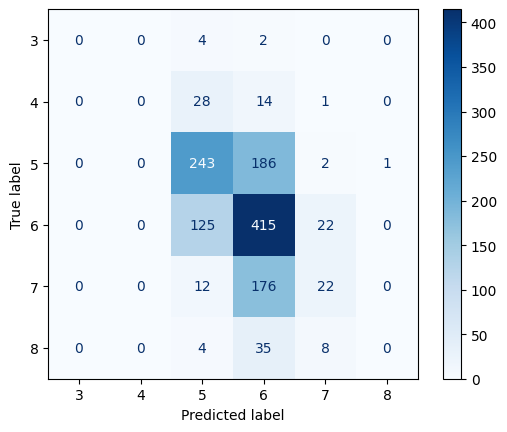

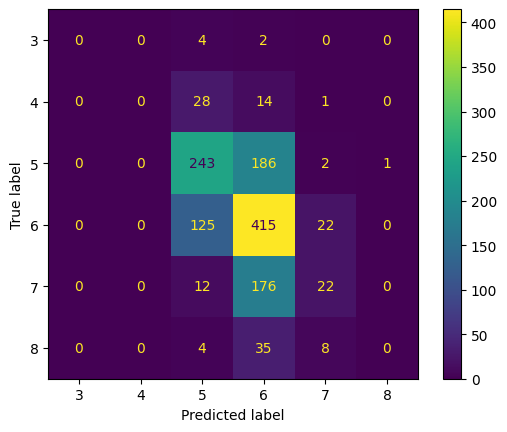




Report para Random Forest:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.65      0.61      0.63       432
           6       0.54      0.77      0.63       562
           7       0.57      0.25      0.34       210
           8       0.00      0.00      0.00        47

    accuracy                           0.57      1300
   macro avg       0.29      0.27      0.27      1300
weighted avg       0.54      0.57      0.54      1300

Matriz de Confusión:


c:\Users\aferreiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aferreiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aferreiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

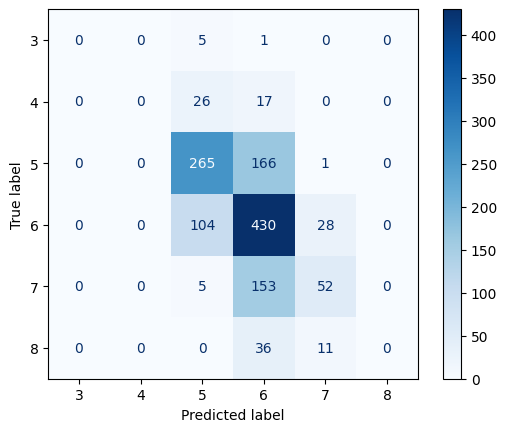

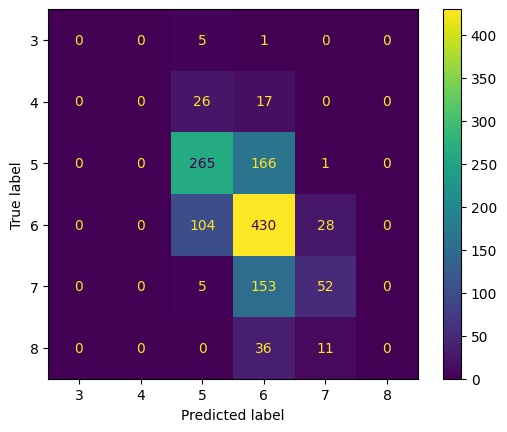




Report para LGBMClassifier:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.54      0.16      0.25        43
           5       0.69      0.68      0.68       432
           6       0.64      0.72      0.68       562
           7       0.60      0.57      0.58       210
           8       0.79      0.49      0.61        47

    accuracy                           0.65      1300
   macro avg       0.54      0.44      0.47      1300
weighted avg       0.65      0.65      0.64      1300

Matriz de Confusión:


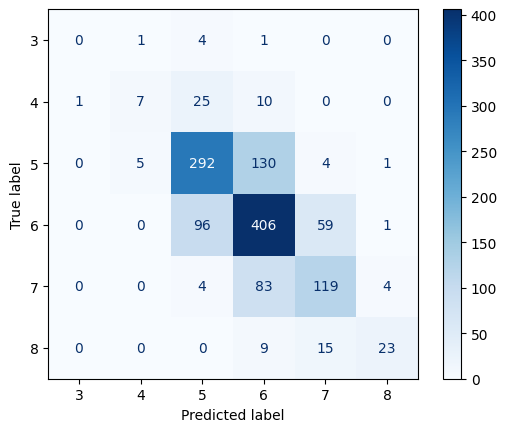

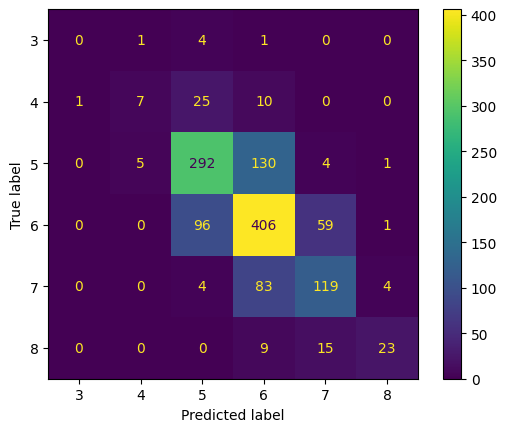

In [25]:
for nombre, modelo in zip(["Regresion Logistica", "Random Forest", "LGBMClassifier"], [lr_clf, rf_clf, lgb_clf]):
    print(f"Report para {nombre}:")
    print(classification_report(y_test, modelo.predict(X_test)))
    print("Matriz de Confusión:")
    ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test, cmap="Blues").plot()
    plt.show()
    print("\n\n")

In [27]:
param_grid = {
    'num_leaves': [20, 31],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [50, 100],
}

lgb_clf = LGBMClassifier()

# Instancia GridSearchCV
grid_search = GridSearchCV(lgb_clf, param_grid, cv=5, scoring='precision', n_jobs=-1)

# Entrena el modelo
grid_search.fit(X_train, y_train)

# Muestra los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Muestra el mejor score
print("Mejor score de validación cruzada:", grid_search.best_score_)

c:\Users\aferreiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1519
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 12
[LightGBM] [Info] Start training from score -5.377783
[LightGBM] [Info] Start training from score -3.402545
[LightGBM] [Info] Start training from score -1.113930
[LightGBM] [Info] Start training from score -0.826541
[LightGBM] [Info] Start training from score -1.788494
[LightGBM] [Info] Start training from score -3.572230
[LightGBM] [Info] Start training from score -6.946399
Mejores hiperparámetros encontrados:
{'learning_rate': 0.1, 'n_estimators': 50, 'num_leaves': 20}
Mejor score de validación cruzada: nan


### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [29]:
df = pd.read_csv("./data/wines_dataset.csv",sep = "|")
df
target = "alcohol"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

<Axes: xlabel='alcohol', ylabel='Count'>

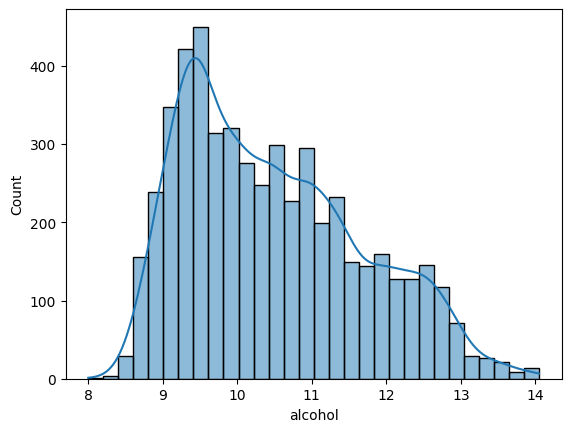

In [30]:
sns.histplot(train_set[target], kde = True)

In [31]:
corr = train_set.corr(numeric_only= True)
np.abs(corr[target]).sort_values(ascending = False)

alcohol                 1.000000
density                 0.682345
quality                 0.450403
residual sugar          0.357459
total sulfur dioxide    0.272970
chlorides               0.260508
free sulfur dioxide     0.188460
pH                      0.116497
fixed acidity           0.091964
volatile acidity        0.036041
class                   0.026966
citric acid             0.005690
sulphates               0.000412
Name: alcohol, dtype: float64

<Axes: >

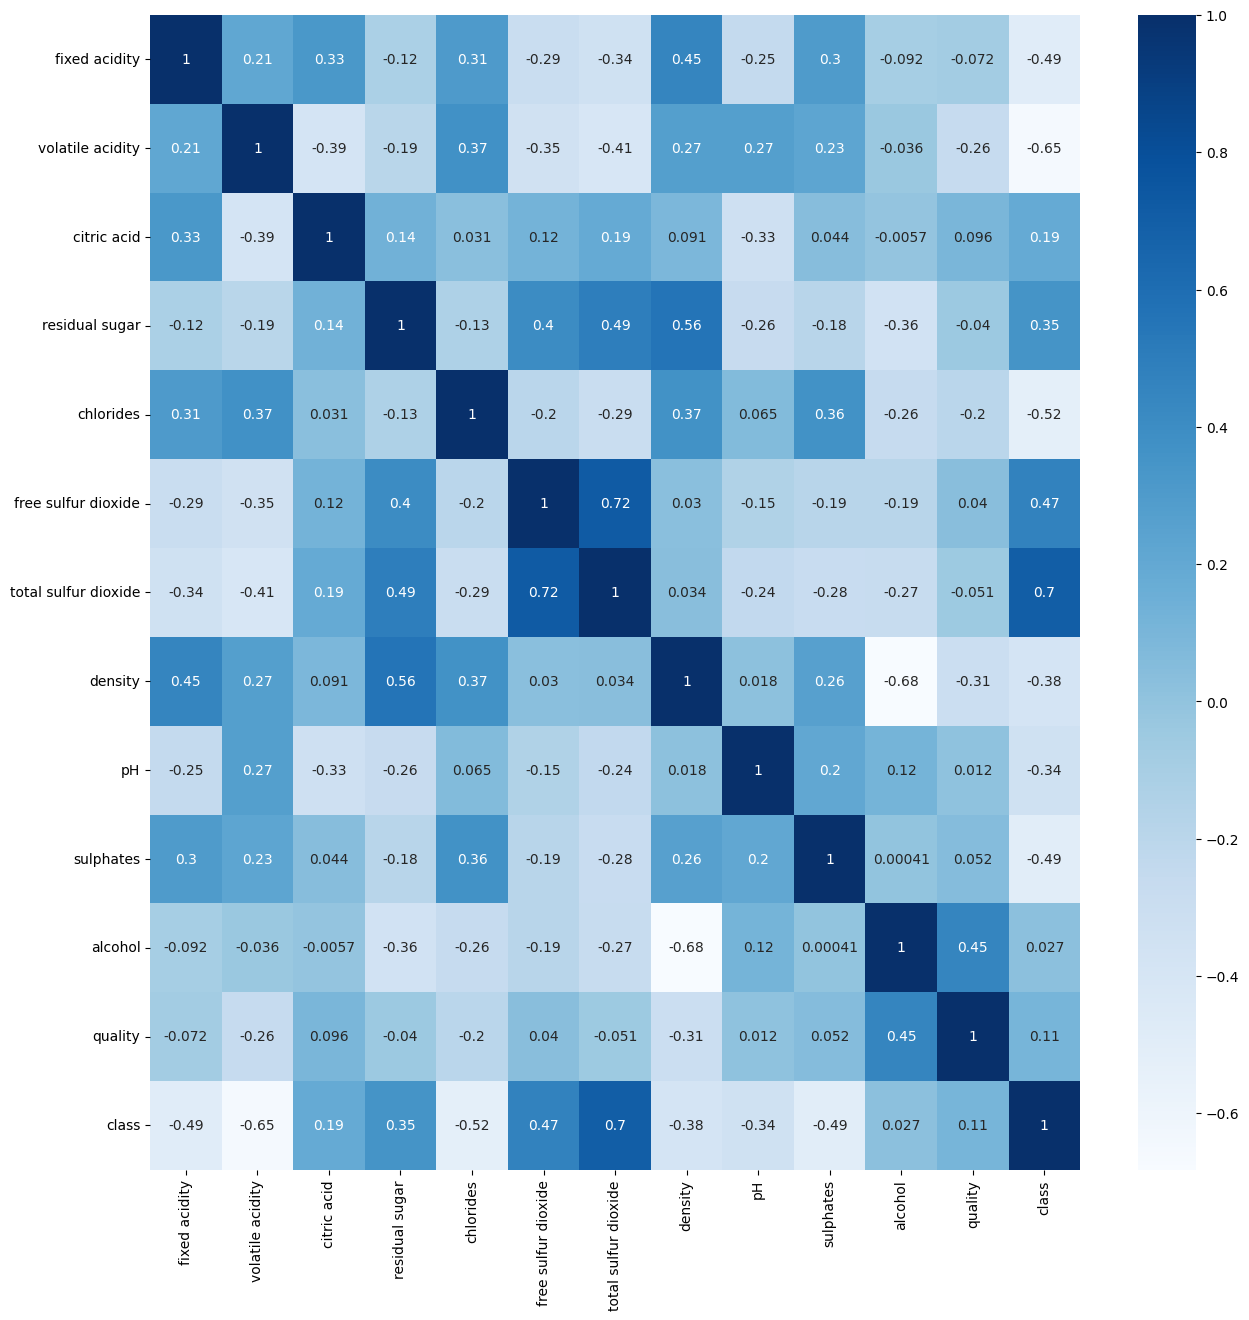

In [32]:
plt.figure(figsize = (15,15))
sns.heatmap(corr, annot= True, cmap = "Blues")

In [ ]:
features_num = train_set.columns.to_list()

In [33]:
criterio_col = 0.4
excluidas = []
for col in features_num:
    print(f"Voy a comprobar la colinealidad con {col}")
    if col not in excluidas:
        for col_2,valor_corr in corr[col].items():
            print(f"Comprobando con {col_2}")
            if col != col_2 and col_2 in features_num:
                if np.abs(valor_corr) >= criterio_col:
                    print(f"Correlo al {valor_corr}, por eso excluyo a {col_2}")
                    excluidas.append(col_2)
                else:
                    print(f"Conmigo no tiene problema, dejo a {col_2} tranquila")
            elif col == col_2:
                print("soy yo misma, no me excluyo")
            else:
                print("No estaba ya en la lista original, no hago nada")
excluidas = list(set(excluidas))

Voy a comprobar la colinealidad con fixed acidity
Comprobando con fixed acidity
soy yo misma, no me excluyo
Comprobando con volatile acidity
Conmigo no tiene problema, dejo a volatile acidity tranquila
Comprobando con citric acid
Conmigo no tiene problema, dejo a citric acid tranquila
Comprobando con residual sugar
Conmigo no tiene problema, dejo a residual sugar tranquila
Comprobando con chlorides
Conmigo no tiene problema, dejo a chlorides tranquila
Comprobando con free sulfur dioxide
Conmigo no tiene problema, dejo a free sulfur dioxide tranquila
Comprobando con total sulfur dioxide
Conmigo no tiene problema, dejo a total sulfur dioxide tranquila
Comprobando con density
Correlo al 0.4534465806801762, por eso excluyo a density
Comprobando con pH
Conmigo no tiene problema, dejo a pH tranquila
Comprobando con sulphates
Conmigo no tiene problema, dejo a sulphates tranquila
Comprobando con alcohol
Conmigo no tiene problema, dejo a alcohol tranquila
Comprobando con quality
No estaba ya en

In [35]:
features_all = train_set.columns.to_list()
features_all.remove("alcohol")
r_umbral = 0.15
correlaciones = np.abs(corr[target])
features_num_1 = correlaciones[correlaciones > 0.15].index.to_list()
features_num_1

['residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'alcohol',
 'quality']

In [36]:
criterio_col = 0.7
excluidas = []
for col in features_num_1:
    print(f"Voy a comprobar la colinealidad con {col}")
    if col not in excluidas:
        for col_2,valor_corr in corr[col].items():
            print(f"Comprobando con {col_2}")
            if col != col_2 and col_2 in features_num:
                if np.abs(valor_corr) >= criterio_col:
                    print(f"Correlo al {valor_corr}, por eso excluyo a {col_2}")
                    excluidas.append(col_2)
                else:
                    print(f"Conmigo no tiene problema, dejo a {col_2} tranquila")
            elif col == col_2:
                print("soy yo misma, no me excluyo")
            else:
                print("No estaba ya en la lista original, no hago nada")
excluidas = list(set(excluidas))
features_num_0 = [col for col in features_num_1 if col not in excluidas]
print("Excluidas: ", excluidas)
print("Set reducido de features:", features_num_0)

Voy a comprobar la colinealidad con residual sugar
Comprobando con fixed acidity
Conmigo no tiene problema, dejo a fixed acidity tranquila
Comprobando con volatile acidity
Conmigo no tiene problema, dejo a volatile acidity tranquila
Comprobando con citric acid
Conmigo no tiene problema, dejo a citric acid tranquila
Comprobando con residual sugar
soy yo misma, no me excluyo
Comprobando con chlorides
Conmigo no tiene problema, dejo a chlorides tranquila
Comprobando con free sulfur dioxide
Conmigo no tiene problema, dejo a free sulfur dioxide tranquila
Comprobando con total sulfur dioxide
Conmigo no tiene problema, dejo a total sulfur dioxide tranquila
Comprobando con density
Conmigo no tiene problema, dejo a density tranquila
Comprobando con pH
Conmigo no tiene problema, dejo a pH tranquila
Comprobando con sulphates
Conmigo no tiene problema, dejo a sulphates tranquila
Comprobando con alcohol
Conmigo no tiene problema, dejo a alcohol tranquila
Comprobando con quality
No estaba ya en la l

In [37]:
y_train = train_set[target]
y_test = test_set[target]

features_set_names = ["reducido","alta_correlacion","completo"]

X_train_dict = {}
X_test_dict = {}

for nombre, feature_list in zip(features_set_names, [features_num_0, features_num_1, features_all]):
    X_train_dict[nombre] = train_set[feature_list]
    X_test_dict[nombre] = test_set[feature_list]

In [38]:
rf_reg = RandomForestRegressor(max_depth = 10, random_state= 42) # El número de niveles para "probar" lo pongo más alto que en clasificación porque el rango de valores de la target es mucho mayor
xgb_reg = XGBRegressor(max_depth = 10, random_state = 42)
lgb_reg = LGBMRegressor(max_depth = 10, random_state = 42, verbose = -100)


modelos = {
    "Random Forest": rf_reg,
    "Lightgbm": lgb_reg,
    "XGBoost": xgb_reg
}


In [39]:
for feature_set, X_train in X_train_dict.items():
    print(f"Para el set {feature_set}:")
    for tipo,modelo in modelos.items():
        print(f"{tipo}: ", end = " ")
        print(np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "neg_mean_absolute_error")))
    print("******")

Para el set reducido:
Random Forest:  -0.0004610639545040653
Lightgbm:  -0.0030400352710110486
XGBoost:  -0.00046086320084164843
******
Para el set alta_correlacion:
Random Forest:  -0.00048452354335935577
Lightgbm:  -0.003084502519213764
XGBoost:  -0.00045313561798349274
******
Para el set completo:
Random Forest:  -0.32346038200434696
Lightgbm:  -0.2820208900993424
XGBoost:  -0.2579141124670481
******


In [40]:
param_grid = {
    "n_estimators": [100,200,400], # 
    "max_depth": [1,5,10],
    "min_samples_leaf": [1,10,20],
    "max_features": ["sqrt","log2",None]
}

rf_grid = GridSearchCV(rf_reg,
                       param_grid= param_grid,
                       cv = 5,
                       scoring = "neg_mean_absolute_error")

rf_grid.fit(X_train_dict[features_set_names[1]], y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=10, random_state=42),
             param_grid={'max_depth': [1, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 10, 20],
                         'n_estimators': [100, 200, 400]},
             scoring='neg_mean_absolute_error')

In [41]:
y_pred = rf_grid.best_estimator_.predict(X_test_dict[features_set_names[1]])
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RSME:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.0013240897436335157
RSME: 0.026958174695366672


In [42]:

def plot_predictions_vs_actual(y_real, y_pred):
    """
    Función para graficar los valores reales vs. los valores predichos en una regresión.

    Args:
    y_real (array-like): Valores reales de la variable objetivo.
    y_pred (array-like): Valores predichos de la variable objetivo.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_real, alpha=0.5)
    plt.xlabel("Valores Predichos")
    plt.ylabel("Valores Reales")

    # Línea y=x
    max_value = max(max(y_real), max(y_pred))
    min_value = min(min(y_real), min(y_pred))
    plt.plot([min_value, max_value], [min_value, max_value], 'r')

    plt.title("Comparación de Valores Reales vs. Predichos")
    plt.show()

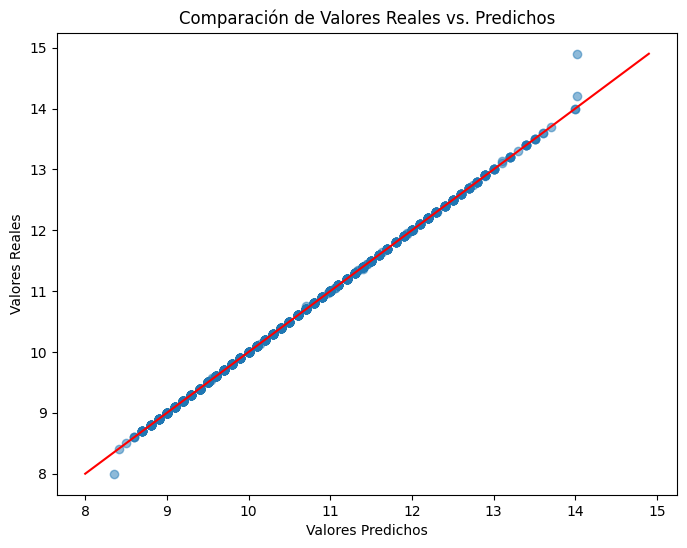

In [43]:
plot_predictions_vs_actual(y_test, y_pred)